### User Demographics

Here we try to analyse user demographics per program based on their age bracket, gender, and interest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('demographic.csv')

In [3]:
del df['Unnamed: 0']

Below, we can see the main structure of the data, and the first 5 value of the data

In [4]:
df.head()

,ga:interestAffinityCategory,ga:landingPagePath,ga:userAgeBracket,ga:userGender,ga:users
0,Food & Dining/Cooking Enthusiasts/30 Minute Chefs,/,25-34,female,12.0
1,News & Politics/Avid News Readers/Entertainmen...,/,25-34,female,10.0
2,Shoppers/Bargain Hunters,/,25-34,female,12.0
3,Shoppers/Value Shoppers,/,25-34,female,12.0
4,Lifestyles & Hobbies/Green Living Enthusiasts,/,18-24,male,10.0


In [5]:
df['program'] = df['ga:landingPagePath'].str.split('/').str[1]

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True)

To find out which program the user visited, we should separate programs name from the full URL on ga:landingPagePath column. 

In [8]:
df['program'] = df['program'].fillna(df['ga:landingPagePath'])

In [9]:
df.head()

,ga:interestAffinityCategory,ga:landingPagePath,ga:userAgeBracket,ga:userGender,ga:users,program
0,Food & Dining/Cooking Enthusiasts/30 Minute Chefs,/,25-34,female,12.0,/
1,News & Politics/Avid News Readers/Entertainmen...,/,25-34,female,10.0,/
2,Shoppers/Bargain Hunters,/,25-34,female,12.0,/
3,Shoppers/Value Shoppers,/,25-34,female,12.0,/
4,Lifestyles & Hobbies/Green Living Enthusiasts,/,18-24,male,10.0,/


In [14]:
df.program.replace(['kamar-ganti','tompinglenn','tompi-n-glenn','mata-najwahttps:'],['kamar-ganti-pandit','tompi-glenn','tompi-glenn','mata-najwa'], inplace=True)


In [16]:
#df.to_csv('demographics.csv')

In [15]:
df.dtypes

ga:interestAffinityCategory     object
ga:landingPagePath              object
ga:userAgeBracket               object
ga:userGender                   object
ga:users                       float64
program                         object
dtype: object

Most of the user of narasi.tv is a male with range of 25-34 age bracket

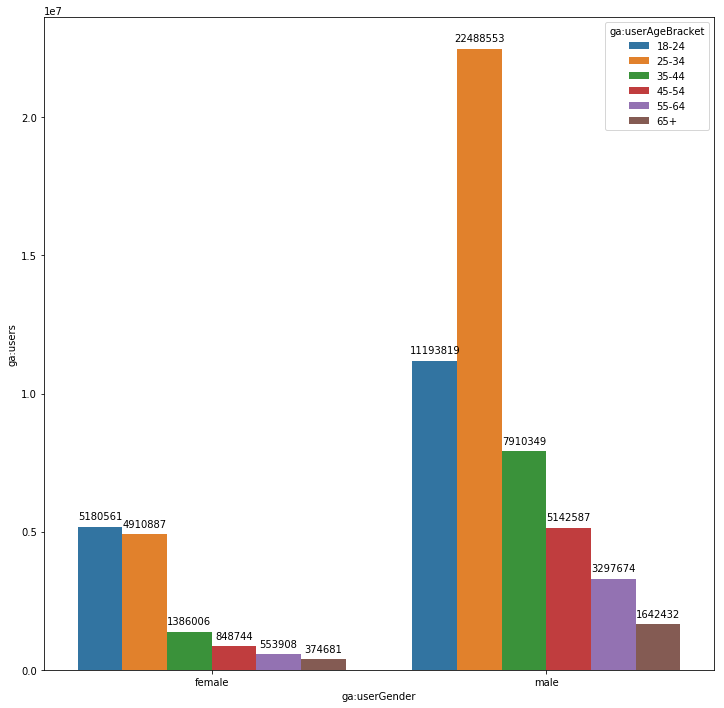

In [52]:
df_1 = df.groupby(['ga:userAgeBracket','ga:userGender'], as_index=False)[['ga:users']].sum()

fig, ax = plt.subplots(1,1, figsize=(12,12))

g = sns.barplot(x='ga:userGender', y='ga:users', hue='ga:userAgeBracket',
                hue_order=['18-24', '25-34','35-44','45-54','55-64','65+'], 
                data=df_1, ci=None)

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.0f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)

In [17]:
df_2 = df.loc[(df['program'] == 'mata-najwa') | (df['program'] == 'catatan-najwa') |  (df['program'] == 'buka-mata') |
             (df['program'] == 'mata-mata') | (df['program'] == 'narasi-people') | (df['program'] == 'garing-girang') |
             (df['program'] == 'sarah-secharian') | (df['program'] == 'event') | (df['program'] == 'kamar-ganti-pandit') |
             (df['program'] == 'shihab-shihab') | (df['program'] == 'duo-budjang') | (df['program'] == 'teppy-o-meter') |
             (df['program'] == 'kejar-tayang') | (df['program'] == 'tompi-glenn')] 

List of programs

In [18]:
df_2['program'].unique().tolist()

['shihab-shihab',
 'mata-najwa',
 'catatan-najwa',
 'buka-mata',
 'kejar-tayang',
 'tompi-glenn',
 'mata-mata',
 'narasi-people',
 'duo-budjang',
 'teppy-o-meter',
 'event',
 'kamar-ganti-pandit',
 'garing-girang',
 'sarah-secharian']

Event got the most users compared to the others with 25-34 age bracket as the highest segment. Most of the users are male

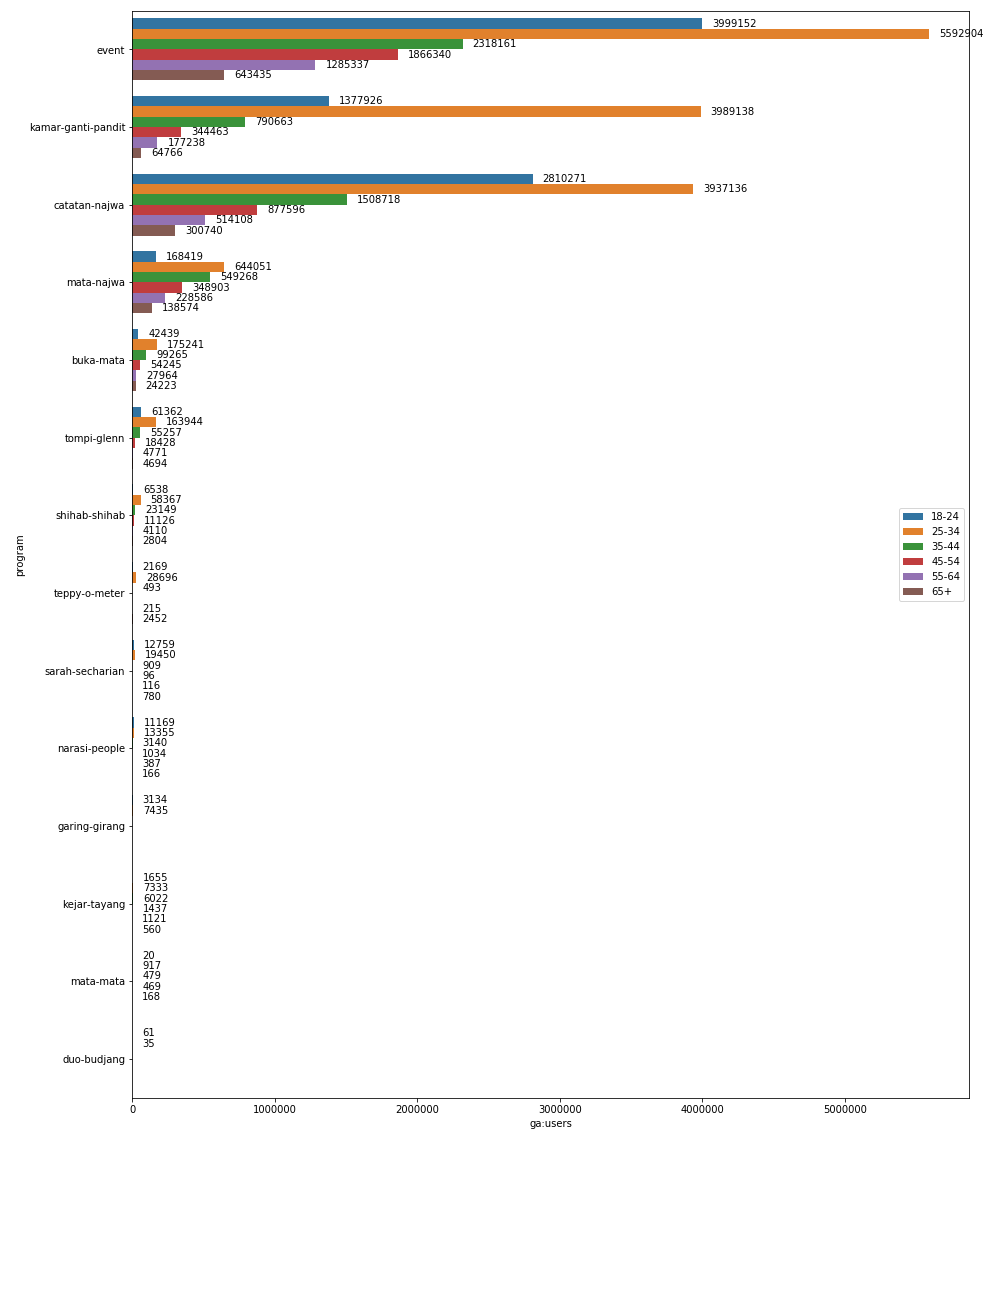

In [83]:
df_3 = df_2.groupby(['ga:userAgeBracket','program'], as_index=False)[['ga:users']].sum().sort_values(by=['ga:users'], ascending=False)

fig, ax_1 = plt.subplots(1,1, figsize=(15,20))

#plt.xticks(rotation=90)

g = sns.barplot(y='program', x='ga:users', hue='ga:userAgeBracket',
                hue_order=['18-24', '25-34','35-44','45-54','55-64','65+'], 
                data=df_3, ci=None)

g.legend(loc=5)


rects_1 = ax_1.patches

for rect in rects_1:
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width()
    
    space = 5
    
    va = 'top'
    
    label = '{:.0f}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(10, space),
        textcoords='offset points',
        ha = 'left',
        va = va)

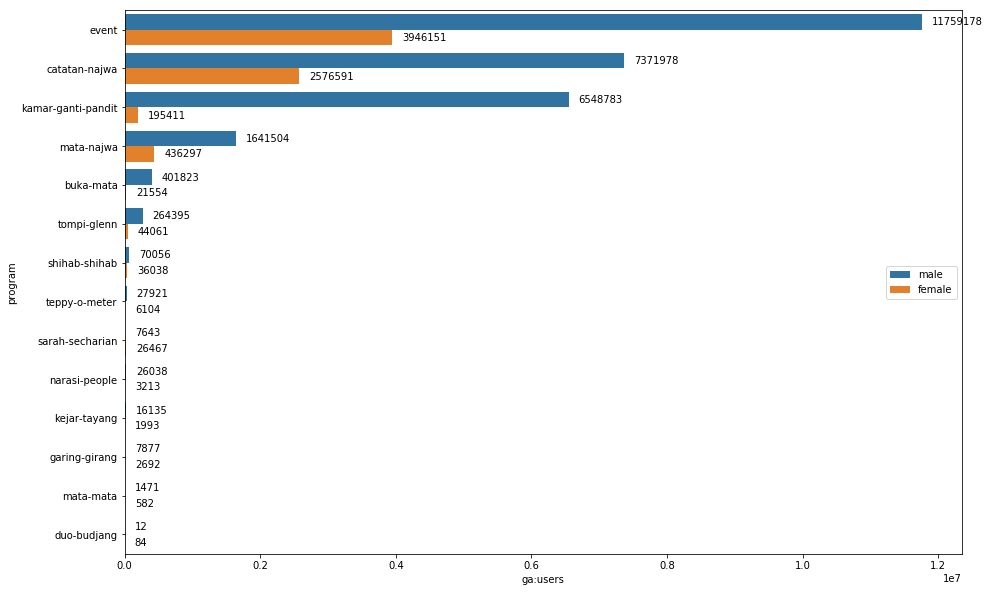

In [82]:
df_3 = df_2.groupby(['ga:userGender','program'], as_index=False)[['ga:users']].sum().sort_values(by=['ga:users'], ascending=False)

fig, ax_1 = plt.subplots(1,1, figsize=(15,10))

#plt.xticks(rotation=90)

g = sns.barplot(y='program', x='ga:users', hue='ga:userGender',
                data=df_3, ci=None)

g.legend(loc=5)


rects_1 = ax_1.patches

for rect in rects_1:
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width()
    
    space = 5
    
    va = 'top'
    
    label = '{:.0f}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(10, space),
        textcoords='offset points',
        ha = 'left',
        va = va)

Below are the top 25 Interest per program, as we see that Sports & Fitness/Sports Fans is the highest interest with more than 180000, generated from Kamar Ganti Pandit program, mostly male with 25-34 age bracket.

In [81]:
df_4 = df_2.groupby(['ga:userAgeBracket','ga:userGender','program','ga:interestAffinityCategory'], as_index=False)[['ga:users']].sum().sort_values(by=['ga:users'], ascending=False)
df_4.head(25)

,ga:userAgeBracket,ga:userGender,program,ga:interestAffinityCategory,ga:users
2649,25-34,male,kamar-ganti-pandit,Sports & Fitness/Sports Fans,188652.0
2663,25-34,male,kamar-ganti-pandit,Sports & Fitness/Sports Fans/Soccer Fans,182308.0
2482,25-34,male,event,Sports & Fitness/Sports Fans,157454.0
2497,25-34,male,event,Sports & Fitness/Sports Fans/Soccer Fans,142857.0
2414,25-34,male,event,Lifestyles & Hobbies/Business Professionals,140174.0
2467,25-34,male,event,News & Politics/Avid News Readers,138300.0
2480,25-34,male,event,Shoppers/Value Shoppers,136075.0
2571,25-34,male,kamar-ganti-pandit,Beauty & Wellness/Frequently Visits Salons,133114.0
2584,25-34,male,kamar-ganti-pandit,Lifestyles & Hobbies/Business Professionals,128187.0
2502,25-34,male,event,Technology/Mobile Enthusiasts,122641.0
